# CS5481 - Tutorial 8
## Social Network and Anomaly Detection

Welcome to CS5481 tutorial 8. In this tutorial, you will learn how to represent a graph, compute some important graph attributions with networkx and do anomaly detection with pyod


# Context
1. Anomaly Detection
2. Create a Graph and obtain its attributions with networkx
3. Practice

# 1. Anomaly Detection


* KMeans
* PCA
* IsolationForest
* SVM
* EllipticEnvelope

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme();
sns.set_style("darkgrid",{"font.sans-serif":['simhei','Droid Sans Fallback']})
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.models.pca import PCA
from pyod.models.lscp import LSCP
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("order_num.csv")
df

,date,num_people,num_order
0,2019-01-01,1046.0,295.0
1,2019-01-02,733.0,191.0
2,2019-01-03,695.0,222.0
3,2019-01-04,580.0,193.0
4,2019-01-05,844.0,285.0
...,...,...,...
890,2020-10-31,NaN,346.0
891,2020-11-30,NaN,204.0
892,2020-12-31,NaN,288.0
893,2021-01-31,NaN,254.0


## Filtering Missing Values

In [3]:
print(" num_people: %d ." % df['num_people'].isnull().sum())
print("num_order %d ." % df['num_order'].isnull().sum())
df=df[~df.num_people.isnull()==True]
df=df[~df.num_order.isnull()==True]
print("total:",len(df))

 num_people: 58 .
num_order 35 .
total: 802


count      802.000000
mean      1002.246883
std        698.302067
min          9.000000
25%        694.250000
50%        921.500000
75%       1190.500000
max      15087.000000
Name: num_people, dtype: float64

count    802.000000
mean     248.438903
std       73.424284
min        3.000000
25%      193.000000
50%      241.000000
75%      296.750000
max      588.000000
Name: num_order, dtype: float64


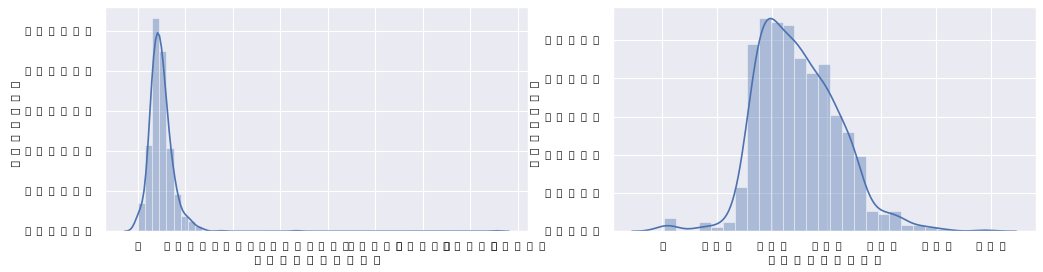

In [8]:
print(df.num_people.describe())
print()
print(df.num_order.describe())
plt.figure(figsize=(15,8), dpi=80)
plt.subplot(221)
sns.distplot(df['num_people']);

plt.subplot(222)
sns.distplot(df['num_order']);

In [9]:
print("num_people's Skewness: %f" % df['num_people'].skew())
print("num_people's Kurtosis: %f " % df['num_people'].kurt())
print()
print("num_order's Skewness: %f" % df['num_order'].skew())
print("num_order's Kurtosis: %f" % df['num_order'].kurt())

num_people's Skewness: 11.165755
num_people's Kurtosis: 211.579274 

num_order's Skewness: 0.429138
num_order's Kurtosis: 1.114412


## Isolation Forest


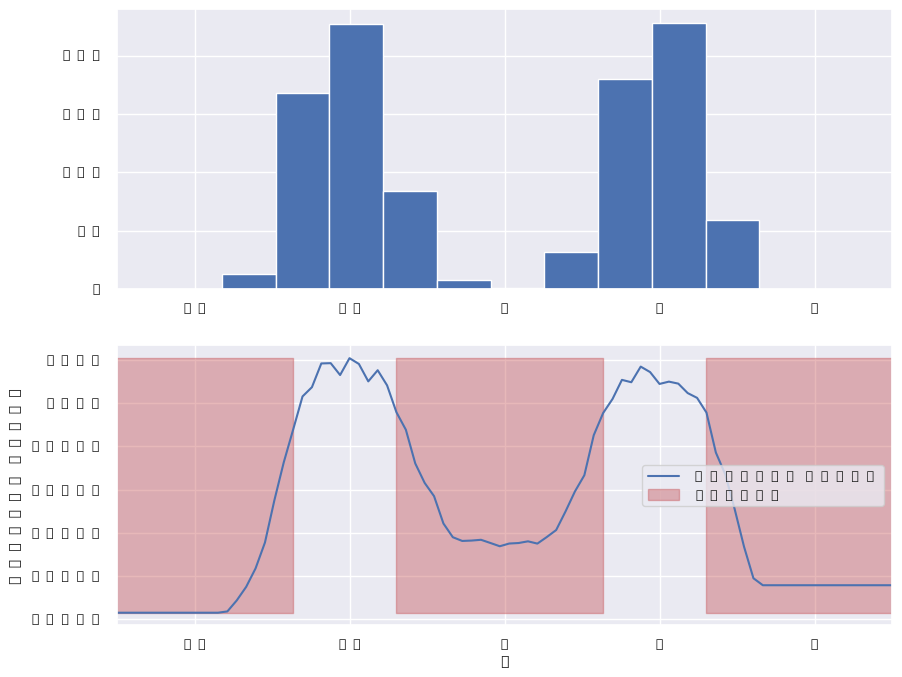

In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
x = np.concatenate((np.random.normal(loc=-2, scale=.5,size=500), np.random.normal(loc=2, scale=.5, size=500)))

isolation_forest = IsolationForest(n_estimators=100) 
isolation_forest.fit(x.reshape(-1, 1)) 
xx = np.linspace(-6, 6, 100).reshape(-1,1) 
anomaly_score = isolation_forest.decision_function(xx) 
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.hist(x) 
plt.xlim([-5, 5]) 

plt.subplot(2,1,2)
plt.plot(xx, anomaly_score, label='anomaly score') 
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), where=outlier==-1, color='r', alpha=.4, label='region') 
plt.legend() 
plt.ylabel('anomaly score') 
plt.xlabel('x') 
plt.xlim([-5, 5]) 
plt.show()

## Using Isolation Forest Algorithm to Monitor Anomalous Regions in Passenger Flow and Order Volume


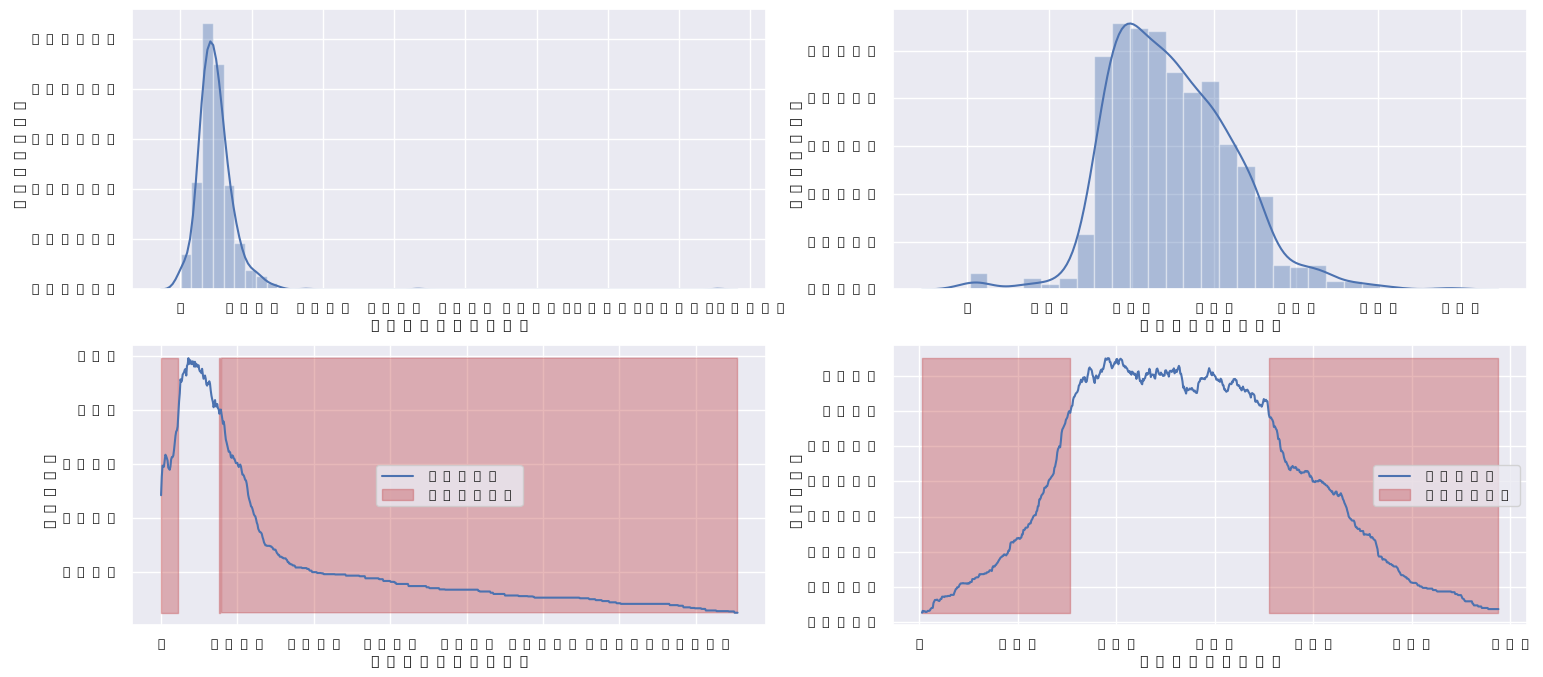

In [ ]:

IF1 = IsolationForest(n_estimators=100)

IF1.fit(df['num_people'].values.reshape(-1, 1))

x1 = np.linspace(df['num_people'].min(), df['num_people'].max(), len(df)).reshape(-1,1)

anomaly_score1 = IF1.decision_function(x1)

outlier1 = IF1.predict(x1)

IF2 = IsolationForest(n_estimators=100)

IF2.fit(df['num_order'].values.reshape(-1, 1))

x2 = np.linspace(df['num_order'].min(), df['num_order'].max(), len(df)).reshape(-1,1)

anomaly_score2 = IF2.decision_function(x2)

outlier2 = IF2.predict(x2)

plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
sns.distplot(df['num_people'])

plt.subplot(2,2,2)
sns.distplot(df['num_order'])

plt.subplot(2,2,3)
plt.plot(x1, anomaly_score1, label='score')
plt.fill_between(x1.T[0], np.min(anomaly_score1), np.max(anomaly_score1), 
                 where=outlier1==-1, color='r', 
                 alpha=.4, label='region')
plt.legend()
plt.ylabel('score')
plt.xlabel('num_people')

plt.subplot(2,2,4)
plt.plot(x2, anomaly_score2, label='score')
plt.fill_between(x2.T[0], np.min(anomaly_score2), np.max(anomaly_score2), 
                 where=outlier2==-1, color='r', 
                 alpha=.4, label='region')
plt.legend()
plt.ylabel('score')
plt.xlabel('num_order')
plt.show();

In [14]:
x1_outlier = x1[outlier1==-1]
right_min = x1_outlier[x1_outlier>1000].min()
left_max = x1_outlier[x1_outlier<1000].max()
print('Maximum anomaly value on the left side of passenger flow anomaly region:', df[df.num_people<=left_max].num_people.max())
print('Minimum anomaly value on the right side of passenger flow anomaly region:', df[df.num_people>=right_min].num_people.min())
print()
x2_outlier = x2[outlier2==-1]
right_min = x2_outlier[x2_outlier>248].min()
left_max = x2_outlier[x2_outlier<248].max()
print('Maximum anomaly value on the left side of order volume anomaly region:', df[df.num_order<=left_max].num_order.max())
print('Minimum anomaly value on the right side of order volume anomaly region:', df[df.num_order>=right_min].num_order.min())

Maximum anomaly value on the left side of passenger flow anomaly region: 459.0
Minimum anomaly value on the right side of passenger flow anomaly region: 1547.0

Maximum anomaly value on the left side of order volume anomaly region: 153.0
Minimum anomaly value on the right side of order volume anomaly region: 356.0


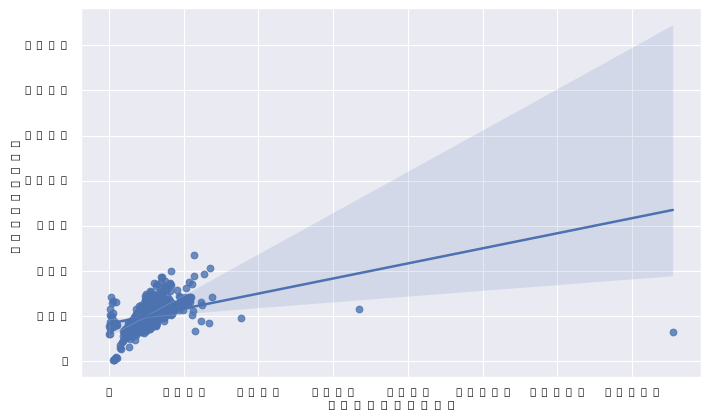

In [15]:
plt.figure(figsize=(10,6), dpi=80)
sns.regplot(data=df,x="num_people", y="num_order");

# 2.Create a Graph and obtain its attributions with Networkx

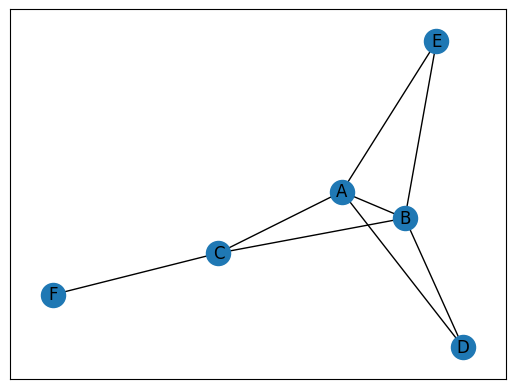

Nodes： ['A', 'B', 'C', 'D', 'E', 'F']
Edges： [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F')]
Number of Edges： 8
Adjacency Matrix of G1:  <Compressed Sparse Row sparse array of dtype 'int64'
	with 16 stored elements and shape (6, 6)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (2, 0)	1
  (2, 1)	1
  (2, 5)	1
  (3, 0)	1
  (3, 1)	1
  (4, 0)	1
  (4, 1)	1
  (5, 2)	1


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# undirectional network
G1 = nx.Graph()
G1.add_edge('A', 'B')
G1.add_edge('A', 'C')
G1.add_edge('A', 'D')
G1.add_edge('A', 'E')
G1.add_edge('B', 'C')
G1.add_edge('B', 'D')
G1.add_edge('B', 'E')
G1.add_edge('F', 'C')

nx.spring_layout(G1)
nx.draw_networkx(G1)
plt.show()
print('Nodes：', G1.nodes())
print('Edges：', G1.edges())
print('Number of Edges：', G1.number_of_edges())
print("Adjacency Matrix of G1: ", nx.adjacency_matrix(G1))


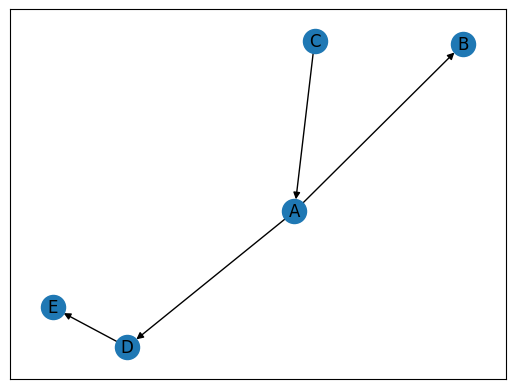

Adjacency Matrix of G2:  <Compressed Sparse Row sparse array of dtype 'int64'
	with 4 stored elements and shape (5, 5)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (2, 4)	1
  (3, 0)	1


In [3]:
# directional network
G2 = nx.DiGraph()
G2.add_edge('A', 'B')
G2.add_edge('A', 'D')
G2.add_edge('C', 'A')
G2.add_edge('D', 'E')

nx.spring_layout(G2)
nx.draw_networkx(G2)
plt.show()
print("Adjacency Matrix of G2: ", nx.adjacency_matrix(G2))

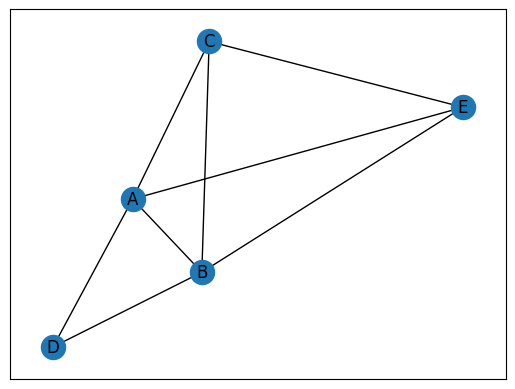

Adjacency Matrix of G3:  <Compressed Sparse Row sparse array of dtype 'int64'
	with 16 stored elements and shape (5, 5)>
  Coords	Values
  (0, 1)	25
  (0, 2)	8
  (0, 3)	11
  (0, 4)	1
  (1, 0)	25
  (1, 2)	4
  (1, 3)	7
  (1, 4)	1
  (2, 0)	8
  (2, 1)	4
  (2, 4)	1
  (3, 0)	11
  (3, 1)	7
  (4, 0)	1
  (4, 1)	1
  (4, 2)	1


In [4]:
# weighted network
G3 = nx.Graph()
G3.add_edge('A', 'B', weight=25)
G3.add_edge('A', 'C', weight=8)
G3.add_edge('A', 'D', weight=11)
G3.add_edge('A', 'E', weight=1)
G3.add_edge('B', 'C', weight=4)
G3.add_edge('B', 'D', weight=7)
G3.add_edge('B', 'E', weight=1)
G3.add_edge('E', 'C', weight=1)
nx.spring_layout(G3)
nx.draw_networkx(G3)
plt.show()

print("Adjacency Matrix of G3: ", nx.adjacency_matrix(G3))

[[ 0. 25.  8. 11.  1.]
 [25.  0.  4.  7.  1.]
 [ 8.  4.  0.  0.  1.]
 [11.  7.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.]]


Text(0, 0.5, 'node idx')

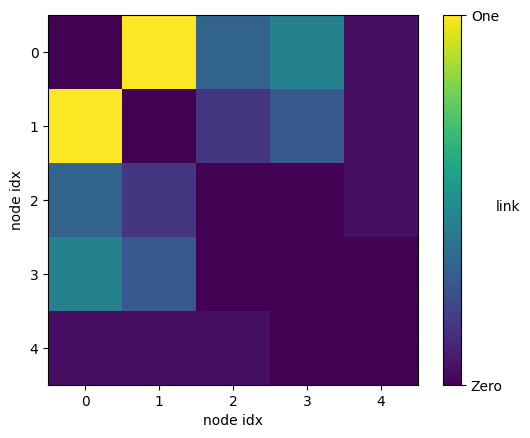

In [5]:
# Plot the Adjacency Matrix of G3
print(nx.to_numpy_array(G3))
plt.imshow(nx.to_numpy_array(G3))
cbar = plt.colorbar() #--> set colorbar heatmap annotation
cbar.set_ticks([0,25]) #--> set colorbar range of ticks
cbar.ax.set_yticklabels(['Zero','One'],) #--set colorbar y-axis label
cbar.set_label('link', rotation=0) #-set colorbar coordination label
plt.xlabel('node idx') #--set x axis
plt.ylabel('node idx') #--set y axis

In [6]:
print('Degree of A in G1：', nx.degree(G1, 'A'))
print('Clustering Coefficient of A in G1：', nx.clustering(G1, 'A')) # 2 * T(n) / deg(u) * (deg(u) - 1)
print('Short Path between A and F in G1：', nx.shortest_path(G1, 'A', 'F'))
print('Length of Short Path between D and E in G3：', nx.shortest_path_length(G3, 'D', 'E'))
print('Eccentricity of Nodes in G1：', nx.eccentricity(G1))

Degree of A in G1： 4
Clustering Coefficient of A in G1： 0.5
Short Path between A and F in G1： ['A', 'C', 'F']
Length of Short Path between D and E in G3： 2
Eccentricity of Nodes in G1： {'A': 2, 'B': 2, 'C': 2, 'D': 3, 'E': 3, 'F': 3}


# Try to create your own graphs with networkx.